In [4]:
import pandas as pd
import numpy as np

In [82]:
data = pd.read_csv("/content/drive/My Drive/Housing_Price_Prediction_Data.csv")

In [83]:
data.shape

(3502, 6)

In [84]:
data.isnull().sum()


,0
SquareFeet,0
Bedrooms,35
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [85]:
#dropping null values
data = data.dropna(axis = 0, subset = ['Bedrooms'])

In [86]:
#removing duplicate rows
data = data.drop_duplicates()

In [87]:
data.shape

(3467, 6)

In [88]:
#handling catagorical variables
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['Neighborhood_enc'] = enc.fit_transform(data['Neighborhood'])

print(data[['Neighborhood', 'Neighborhood_enc']].head())



  Neighborhood  Neighborhood_enc
0        Rural                 0
1        Rural                 0
2       Suburb                 1
3        Urban                 2
4       Suburb                 1


In [89]:
data = data.drop(['Neighborhood'], axis = 1)

In [90]:
#Feature removig using correlation
corr_matrix = data.corr()
print(corr_matrix['Price'].sort_values(ascending = False))

Price               1.000000
SquareFeet          0.742463
Bedrooms            0.071651
Bathrooms           0.033042
YearBuilt           0.007990
Neighborhood_enc   -0.004478
Name: Price, dtype: float64


<Axes: >

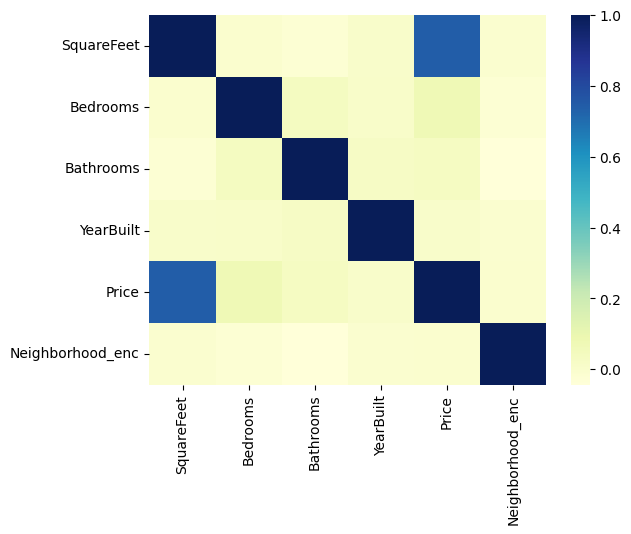

In [91]:
import seaborn as sns

sns.heatmap(corr_matrix, cmap = 'YlGnBu')

In [ ]:
#YearBuilt has the least correlation with the price
data = data.drop(['YearBuilt'], axis = 1)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

regressor = LinearRegression()


x = data.loc[:,['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood_enc']]
y = data['Price']
#Scalling features
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

regressor.fit(X_train_scaled, y_train)

print("Test set accuracy: {:.2f}".format(regressor.score(X_test_scaled, y_test)))

Test set accuracy: 0.53
